In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import tqdm

In [2]:
data = h5py.File('Phys607_project3/src/data/data.h5')
data.keys()

<KeysViewHDF5 ['hc', 'hp']>

In [3]:
hp = data['hp'][:]

/Users/aleyna/miniconda3/envs/comp/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


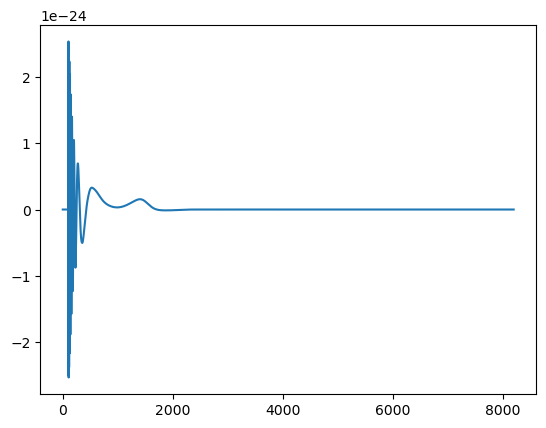

In [4]:
plt.plot(hp)

In [5]:
dim = hp.shape[0]

In [6]:
noise = np.random.normal(0, 1, dim)*10**(-20)

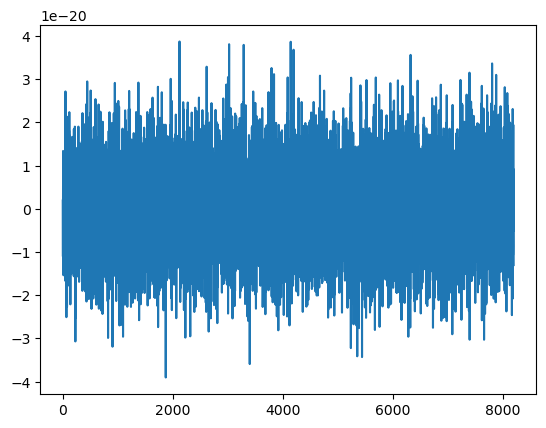

In [7]:
plt.plot(noise)

In [8]:
noisy_hp = hp + noise

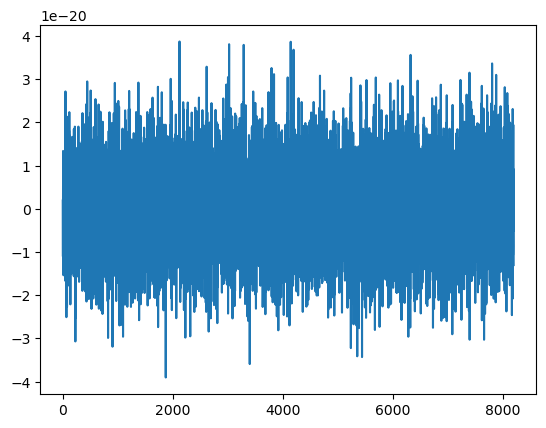

In [9]:
plt.plot(noisy_hp)

In [10]:
def f(data):
    return 1 / (2 * np.pi) ** 0.5 * np.exp(-1/2 * (data) ** 2.0)

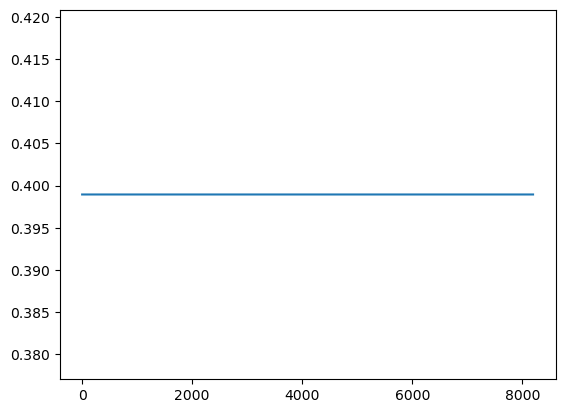

In [11]:
plt. plot(f(noisy_hp))

In [12]:
def post(data, x):
    return 1 / (2 * np.pi) ** 0.5 * np.sum(np.exp(-1/2 * (data-x) ** 2.0))
   

In [13]:
def proposal(x):
    return np.random.normal() + x

In [14]:
def target_distribution(x, time_series_data, noise_std=1):
    # Define your target distribution based on time series data with Gaussian noise
    # This function should return the unnormalized log probability of x

    # Assuming a Gaussian likelihood with known noise standard deviation
    log_likelihood = -0.5 * np.sum((time_series_data - x)**2 / noise_std**2)

    # Add a prior if needed
    # log_prior = ...

    # Combine likelihood and prior
    log_probability = log_likelihood  # + log_prior

    return log_probability

In [15]:
def mcmc(initial, target_distribution, data, prop, iterations):
    x = [initial]
    p = [target_distribution(x[-1], data)]
    for i in tqdm.tqdm(range(iterations)):
        x_test = prop(x[-1])
        p_test = target_distribution(x_test, data)
        acc = p_test / p[-1]
        u = np.random.uniform(0, 1)
        if u <= acc:
            x.append(x_test)
            p.append(p_test)
    return x, p

100%|████████████████████████████| 50000000/50000000 [21:39<00:00, 38489.27it/s]


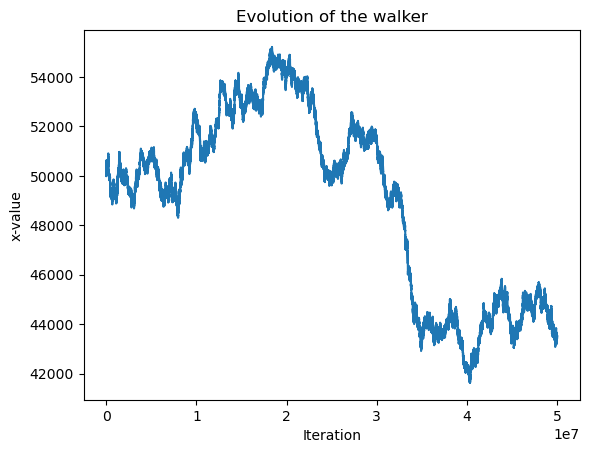

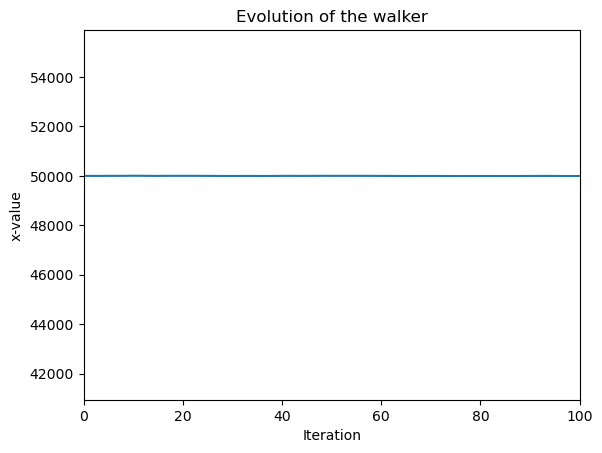

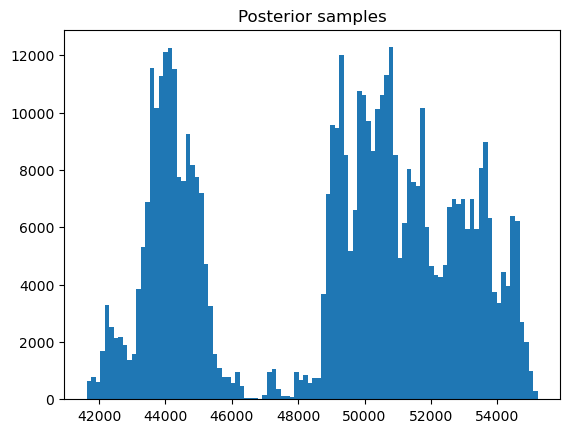

In [16]:
chain, prob = mcmc(50000, target_distribution, noisy_hp, proposal, 50000000)

plt.figure()
plt.title("Evolution of the walker")
plt.plot(chain)
plt.ylabel('x-value')
plt.xlabel('Iteration')

plt.figure()
plt.title("Evolution of the walker")
plt.plot(chain)
plt.xlim(0, 100)
plt.ylabel('x-value')
plt.xlabel('Iteration')

plt.figure()
plt.title("Posterior samples")
_ = plt.hist(chain[100::100], bins=100)

plt.show()

100%|██████████████████████████| 100000000/100000000 [41:38<00:00, 40023.17it/s]


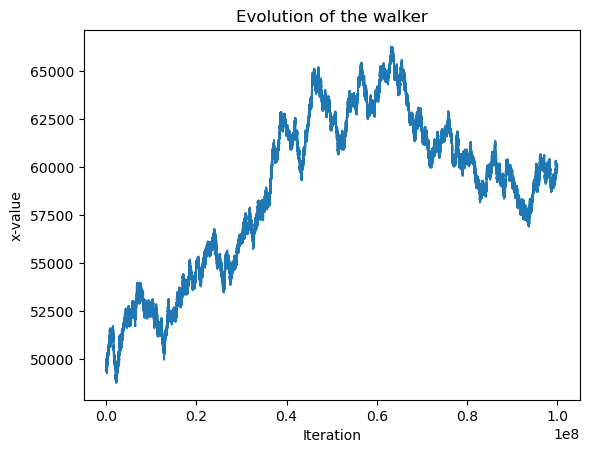

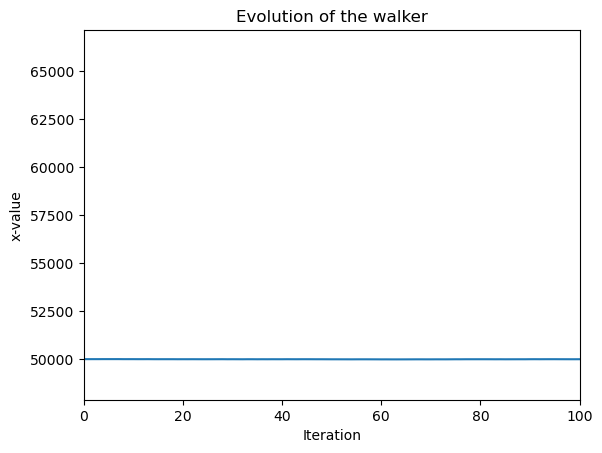

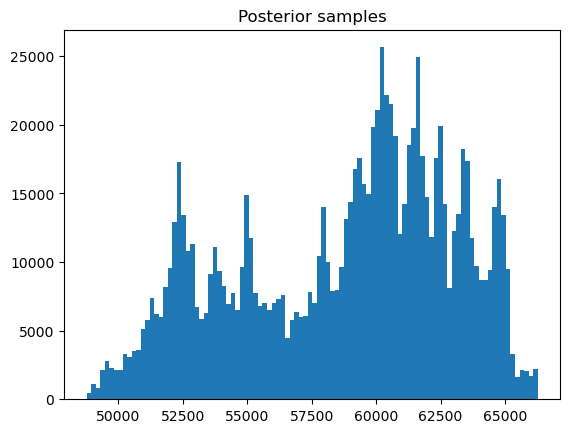

In [19]:
chain, prob = mcmc(50000, target_distribution, noisy_hp, proposal, 100000000)

plt.figure()
plt.title("Evolution of the walker")
plt.plot(chain)
plt.ylabel('x-value')
plt.xlabel('Iteration')

plt.figure()
plt.title("Evolution of the walker")
plt.plot(chain)
plt.xlim(0, 100)
plt.ylabel('x-value')
plt.xlabel('Iteration')

plt.figure()
plt.title("Posterior samples")
_ = plt.hist(chain[100::100], bins=100)

plt.show()